# 检查数据集是否下载成功

In [1]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk("./dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset/AI_Human.csv


# 读入数据

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("./dataset/AI_Human.csv")
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


# 基本数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB
None
Total Texts: 487235
Human Written Texts: 305797
AI Generated Texts: 181438


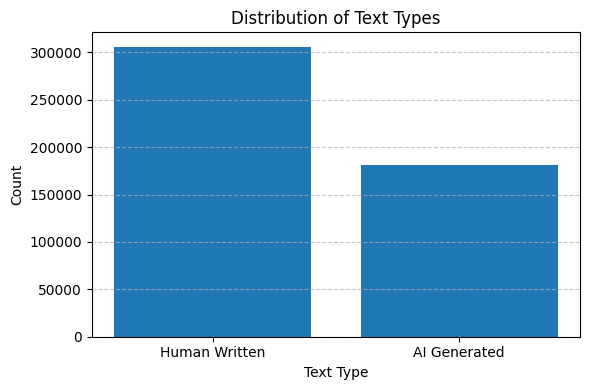

In [3]:
import matplotlib.pyplot as plt

# 基本信息输出
print(df.info())
print("=============================================================================")

# 统计数据
total_texts = df["generated"].count()
human_texts = (df["generated"] == 0.0).sum()
ai_texts = (df["generated"] == 1.0).sum()

print("Total Texts:", total_texts)
print("Human Written Texts:", human_texts)
print("AI Generated Texts:", ai_texts)

# 用 matplotlib 绘制条形图
labels = ["Human Written", "AI Generated"]
counts = [human_texts, ai_texts]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts)
plt.title("Distribution of Text Types")
plt.xlabel("Text Type")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 数据预处理

In [4]:
# 展示其中一个示例条目
df['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

In [5]:
import re

def clean_text_for_classification(text):
    # 转为小写（有助于 CountVectorizer 特征稠密化）
    text = text.lower()

    # 替换换行与多空格（保留语义，但规范格式）
    text = re.sub(r"\s+", " ", text)

    # 去除不可打印字符和 HTML（如果有）
    text = re.sub(r"[^\x00-\x7F]", "", text)
    text = re.sub(r"<.*?>", "", text)

    return text.strip().split()


# 应用改进后的预处理
df["text"] = df["text"].apply(clean_text_for_classification)
df["text"][0]

['cars.',
 'cars',
 'have',
 'been',
 'around',
 'since',
 'they',
 'became',
 'famous',
 'in',
 'the',
 '1900s,',
 'when',
 'henry',
 'ford',
 'created',
 'and',
 'built',
 'the',
 'first',
 'modelt.',
 'cars',
 'have',
 'played',
 'a',
 'major',
 'role',
 'in',
 'our',
 'every',
 'day',
 'lives',
 'since',
 'then.',
 'but',
 'now,',
 'people',
 'are',
 'starting',
 'to',
 'question',
 'if',
 'limiting',
 'car',
 'usage',
 'would',
 'be',
 'a',
 'good',
 'thing.',
 'to',
 'me,',
 'limiting',
 'the',
 'use',
 'of',
 'cars',
 'might',
 'be',
 'a',
 'good',
 'thing',
 'to',
 'do.',
 'in',
 'like',
 'matter',
 'of',
 'this,',
 'article,',
 '"in',
 'german',
 'suburb,',
 'life',
 'goes',
 'on',
 'without',
 'cars,"',
 'by',
 'elizabeth',
 'rosenthal',
 'states,',
 'how',
 'automobiles',
 'are',
 'the',
 'linchpin',
 'of',
 'suburbs,',
 'where',
 'middle',
 'class',
 'families',
 'from',
 'either',
 'shanghai',
 'or',
 'chicago',
 'tend',
 'to',
 'make',
 'their',
 'homes.',
 'experts',
 's

## 移除 stopwords

In [6]:
import nltk
from nltk.corpus import stopwords

text=df['text']
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# text=text.apply(lambda x : ' '.join([word for word in x if word not in stop_words]))
text=text.apply(lambda x : ' '.join([word for word in x]))
print(text[0])
labels=df['generated']

cars. cars have been around since they became famous in the 1900s, when henry ford created and built the first modelt. cars have played a major role in our every day lives since then. but now, people are starting to question if limiting car usage would be a good thing. to me, limiting the use of cars might be a good thing to do. in like matter of this, article, "in german suburb, life goes on without cars," by elizabeth rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either shanghai or chicago tend to make their homes. experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. passenger cars are responsible for 12 percent of greenhouse gas emissions in europe...and up to 50 percent in some carintensive areas in the united states. cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. article, "p

## 数据集划分

In [7]:
from sklearn.model_selection import train_test_split
# 先划分训练集和测试集
X_train_full, X_test, y_train_full, y_test = train_test_split(
    text, labels, test_size=0.1, random_state=42
)

# 再从训练集中划分出验证集
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42  # 可根据需要调整验证集比例
)

## 文本向量化和拼接

In [8]:
import tensorflow as tf

print("✅ TensorFlow version:", tf.__version__)
print("🖥️ Available GPUs:", tf.config.list_physical_devices("GPU"))

# 简单矩阵乘法测试是否用 GPU
with tf.device("/GPU:0"):
    a = tf.random.normal([1000, 1000])
    b = tf.random.normal([1000, 1000])
    c = tf.matmul(a, b)
    print("✅ Matrix multiply done.")

2025-06-02 02:27:42.042323: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-02 02:27:42.128504: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-02 02:27:44.767844: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


✅ TensorFlow version: 2.16.1
🖥️ Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:4', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:5', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:6', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:7', device_type='GPU')]
✅ Matrix multiply done.


2025-06-02 02:27:49.032759: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78548 MB memory:  -> device: 0, name: NVIDIA A800 80GB PCIe, pci bus id: 0000:34:00.0, compute capability: 8.0
2025-06-02 02:27:49.034384: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 79068 MB memory:  -> device: 1, name: NVIDIA A800 80GB PCIe, pci bus id: 0000:35:00.0, compute capability: 8.0
2025-06-02 02:27:49.037117: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 79069 MB memory:  -> device: 2, name: NVIDIA A800 80GB PCIe, pci bus id: 0000:36:00.0, compute capability: 8.0
2025-06-02 02:27:49.039209: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 67932 MB memory:  -> device: 3, name: NVIDIA A800 80GB PCIe, pci bu

In [9]:
vectorized_layer = tf.keras.layers.TextVectorization(ragged=True, max_tokens=20000)
vectorized_layer.adapt(X_train)

train_sequence = vectorized_layer(X_train)
val_sequence = vectorized_layer(X_val)
test_sequence = vectorized_layer(X_test)

train_padded = tf.keras.utils.pad_sequences(
    train_sequence.numpy(),
    maxlen=100,
    padding="pre",
    truncating="pre",
)

val_padded = tf.keras.utils.pad_sequences(
    val_sequence.numpy(), maxlen=100, padding="pre", truncating="pre"
)

test_padded = tf.keras.utils.pad_sequences(
    test_sequence.numpy(),
    maxlen=100,
    padding="pre",
    truncating="pre",
)

In [10]:
X_train = tf.data.Dataset.from_tensor_slices(train_padded)
X_test = tf.data.Dataset.from_tensor_slices(test_padded)

X_val = tf.data.Dataset.from_tensor_slices(val_padded)
y_val = tf.data.Dataset.from_tensor_slices(y_val)

y_train = tf.data.Dataset.from_tensor_slices(y_train)
y_test = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip(X_train, y_train)
val_dataset = tf.data.Dataset.zip((X_val, y_val))
test_dataset = tf.data.Dataset.zip(X_test, y_test)

train_dataset = (
    train_dataset.cache().shuffle(50000).prefetch(tf.data.AUTOTUNE).batch(256)
)
val_dataset = val_dataset.cache().prefetch(tf.data.AUTOTUNE).batch(256)
test_dataset = test_dataset.cache().prefetch(tf.data.AUTOTUNE).batch(256)

# 网络结构设计

## 网络层

In [11]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(100,)),
        tf.keras.layers.Embedding(
            input_dim=20000,
            output_dim=256,
        ),
        tf.keras.layers.SpatialDropout1D(0.2),  # 新增：增强泛化能力
        tf.keras.layers.Conv1D(filters=256, kernel_size=3, activation="relu", padding="same"),
        tf.keras.layers.Conv1D(filters=256, kernel_size=5, activation="relu", padding="same"),  # 新增：更宽感受野
        tf.keras.layers.MaxPooling1D(pool_size=2),  # 新增：降低特征维度，提取重要信息
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
        tf.keras.layers.LayerNormalization(),  # 新增：提高稳定性
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
        tf.keras.layers.LayerNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.5),  # 新增：防止过拟合
        tf.keras.layers.Dense(256, activation="relu"),  # 新增：中间层提升非线性建模能力
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 256)       │     5,120,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 100, 256)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 100, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 100, 256)       │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 50, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 50, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 50, 256)        │           512 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 50, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (None, 50, 256)        │           512 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,120,001 (50.05 MB)

 Trainable params: 13,120,001 (50.05 MB)

 Non-trainable params: 0 (0.00 B)

## 训练

In [13]:
import os

es=tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    verbose=1,
    restore_best_weights=True,
)

history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=val_dataset,
    callbacks=[
        es,
    ],
)

os.makedirs("model_output", exist_ok=True)
# 保存模型（保存整个模型结构 + 参数）
model.save("model_output/lstm_model.keras")

print("✅ 模型已保存到 model_output/lstm_model.keras")

Epoch 1/15


2025-06-02 02:28:49.745427: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


1542/1542 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7869 - loss: 0.5168 - val_accuracy: 0.9835 - val_loss: 0.0777
Epoch 2/15
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.9910 - loss: 0.0324 - val_accuracy: 0.9942 - val_loss: 0.0192
Epoch 3/15
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.9947 - loss: 0.0186 - val_accuracy: 0.9958 - val_loss: 0.0156
Epoch 4/15
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9964 - loss: 0.0144 - val_accuracy: 0.9952 - val_loss: 0.0174
Epoch 5/15
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9969 - loss: 0.0109 - val_accuracy: 0.9953 - val_loss: 0.0158
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 3.
✅ 模型已保存到 model_output/lstm_model.keras


# 模型评估

## F1 score

In [14]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(test_dataset)
y_pred = (y_pred > 0.5).astype(int)
y_test_np = np.concatenate([y for x, y in test_dataset], axis=0)

accuracy = accuracy_score(y_test_np, y_pred)
report = classification_report(y_test_np, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%\n")
print(report)

191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Accuracy: 99.66%

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30496
         1.0       1.00      0.99      1.00     18228

    accuracy                           1.00     48724
   macro avg       1.00      1.00      1.00     48724
weighted avg       1.00      1.00      1.00     48724



2025-06-02 02:31:47.033632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Confusion Matrix

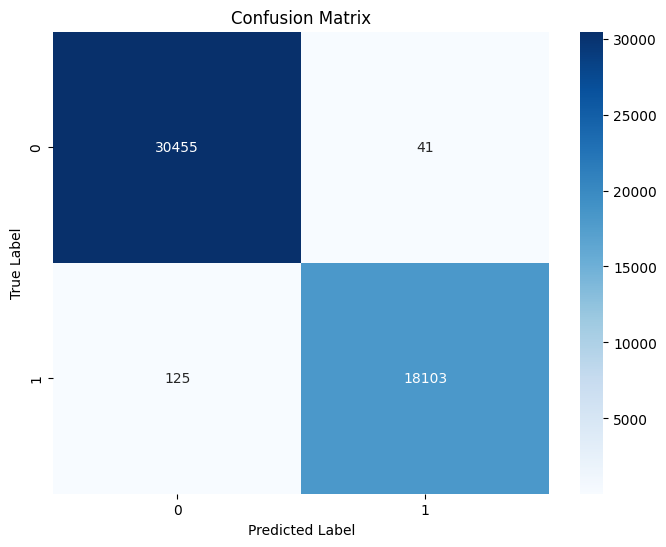

In [15]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_np, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 应用：AI 文本检测

In [16]:
from tensorflow.keras.models import load_model

text_to_predict = input("Enter the text to predict: ")

# Preprocess the input text
text_to_predict = str(text_to_predict).lower().split()
# nltk.download('stopwords', quiet=True)
# stop_words = set(stopwords.words('english'))
text_to_predict = ' '.join([word for word in text_to_predict if word not in stop_words])

# Vectorize the input text
sequence = vectorized_layer([text_to_predict])

# Pad the sequence
padded_sequence = tf.keras.utils.pad_sequences(
    sequence.numpy(),
    maxlen=100,
    padding='pre',
    truncating='pre'
)

# 加载训练好的模型
model = load_model("model_output/lstm_model.keras")

# Make the prediction
prediction = model.predict(padded_sequence)

# Interpret the prediction
if prediction[0][0] > 0.5:
    print("Predicted Label: AI generated")
else:
    print("Predicted Label: Human written")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
Predicted Label: AI generated
